In [2]:
import pandas as pd
import numpy as np
# from joblib import load
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import preprocessing

In [7]:
dfR = pd.read_csv('datasetConPredicciones.csv')
print(len(dfR))
dfR

89465


,Unnamed: 0,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,reciclado,luminoso,acondicionado,quincho,escalera,texto,diferencia_m2,prediccion_m2,porcentaje_m2,prediccion_valor
0,50632,house,Dique Luján,Bs.As. G.B.A. Zona Norte,-34.355907,-58.685825,1.289924e+04,1600.0,1600.0,8.062025,...,0,0,0,0,0,Casa en Dique Lujan. Cod.951 CODIGO: 1911-951 ...,-1047.593578,1055.655603,0.007637,1689048.97
1,51440,store,Posadas,Misiones,-27.364526,-55.897487,1.323332e+03,134.0,134.0,9.875610,...,0,0,0,0,0,LOCAL EN VENTA LOCALVENTA 3 Propiedades ubic...,-1148.183904,1158.059514,0.008528,155179.97
2,58951,store,Bahía Blanca,Buenos Aires Interior,-38.719276,-62.271595,6.231510e+03,750.0,750.0,8.308680,...,0,0,0,0,0,GRAN SALON COMERCIAL - RONDEAU y GUEMES. CODIG...,-961.174882,969.483562,0.008570,727112.67
3,40576,store,Oberá,Misiones,-27.498997,-55.121959,6.231510e+03,631.0,390.0,9.875610,...,0,0,0,0,0,PROPIEDAD CENTRICA EN OBERA CODIGO: 1834-024 u...,-747.898596,757.774206,0.013032,478155.52
4,104072,house,San Miguel,Bs.As. G.B.A. Zona Norte,-34.542267,-58.713495,5.047530e+03,456.0,456.0,11.069145,...,0,0,0,0,0,"Casa - San Miguel DOS DORMITORIOS, COCINA COME...",-830.472063,841.541208,0.013153,383742.79
5,17301,apartment,Punilla,Córdoba,-31.324047,-64.447243,1.065589e+04,600.0,600.0,17.759817,...,0,0,0,0,0,Nºref: 334 -TERRENO EN BIALET MASSE C/INC VIST...,-1021.694019,1039.453835,0.017086,623672.30
6,28152,apartment,General Rodríguez,Bs.As. G.B.A. Zona Oeste,-34.604656,-58.917285,1.065589e+04,482.0,482.0,22.107656,...,0,0,0,0,0,Lote General Rodriguez!!! CODIGO: ubicado en:...,-1136.026700,1158.134356,0.019089,558220.76
7,19182,house,Belén de Escobar,Bs.As. G.B.A. Zona Norte,-34.346365,-58.781418,1.700000e+04,914.0,914.0,18.599562,...,0,0,0,0,0,"Casa 914m², Escobar, Belen de Escobar, por U$S...",-944.485795,963.085357,0.019312,880260.02
8,68007,store,Burzaco,Bs.As. G.B.A. Zona Sur,-34.827497,-58.389415,8.000000e+04,3600.0,3600.0,22.222222,...,0,0,0,0,0,Local en Burzaco LOCAL SOBRE CALLE GORRITTI A ...,-1078.190740,1100.412962,0.020194,3961486.66
9,51890,store,General Rodríguez,Bs.As. G.B.A. Zona Oeste,-34.617390,-58.875983,8.412550e+03,300.0,300.0,28.041833,...,0,0,0,0,0,26 LOTES EXCEPCIONALES EN GENERAL RODRIGUEZ. 2...,-1300.402095,1328.443929,0.021109,398533.18


In [40]:
# compro mis casitas

portafolio = dfR.sample(n=100,random_state=100)

capital = portafolio.price_aprox_usd.sum()
print(capital)

dfR.sort_values(by='porcentaje_m2', ascending=True, inplace=True)
casas_compradas = pd.DataFrame([], columns=dfR.columns)
i = 0
ahorro = 0
cantidadCasas = len(dfR)
print(cantidadCasas)

casasComprables = dfR[dfR.porcentaje_m2 > .5]

cantidadCasas = len(casasComprables)
print(cantidadCasas)
while capital > 0:
    if(i > cantidadCasas-1):
        break
    casa = casasComprables.iloc[i,:]
    valorCasa = casa.price_aprox_usd
    if(capital >= valorCasa):
        ahorro += casa.prediccion_valor - casa.price_aprox_usd
        casas_compradas = casas_compradas.append(casa)
        capital -= valorCasa
    i += 1
    
display(casas_compradas)
    
# while capital > 0:
#     if(i > cantidadCasas-1):
#         break
#     casa = dfR.iloc[i,:]
#     valorCasa = casa.price_aprox_usd
#     if(capital >= valorCasa):
#         ahorro += casa.prediccion_valor - casa.price_aprox_usd
#         casas_compradas = casas_compradas.append(casa)
#         capital -= valorCasa
#     i += 1
    
display(casas_compradas)

# Exportar casos a comprar a CSV
# casas_compradas.to_csv('casas_compradas_lasso.csv')

print('Ahorro total: ', np.round(ahorro, 2))
print(capital)

20388450.008318264
89465
86756


,Unnamed: 0,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,reciclado,luminoso,acondicionado,quincho,escalera,texto,diferencia_m2,prediccion_m2,porcentaje_m2,prediccion_valor
2709,50491,house,Palermo Soho,Capital Federal,-34.589994,-58.423836,310000.000000,340.0,240.0,911.764706,...,0,0,0,0,0,EXCELENTE CASA (PH TOTALMENTE INDEPENDIENTE) 2...,-911.364130,1823.128836,0.500110,619863.80
2710,6154,PH,Villa Rosa,Bs.As. G.B.A. Zona Norte,-34.468460,-58.901550,55000.000000,95.0,95.0,578.947368,...,0,0,0,0,1,DUPLEX EN VENTA EN PILAR (Villa Rosa) Duplex c...,-578.676067,1157.623436,0.500117,109974.23
2711,46082,house,Mar del Plata,Buenos Aires Costa Atlántica,-37.995937,-57.602188,80000.000000,233.0,233.0,343.347639,...,0,0,0,1,0,Casa en Venta. Ambientes. Dormitorios. 233 m2 ...,-343.185833,686.533473,0.500118,159962.30
2712,54053,house,Santa María de los Olivos,Bs.As. G.B.A. Zona Norte,-34.474095,-58.717392,395000.000000,1160.0,230.0,340.517241,...,0,0,1,1,1,Bustamante Propiedades | Santa Maria de los Ol...,-340.316923,680.834164,0.500147,789767.63
2713,37629,house,Moreno,Bs.As. G.B.A. Zona Oeste,-34.597971,-58.751630,50000.000000,2500.0,190.0,20.000000,...,0,0,0,0,0,Casa en Moreno Apta Credito Bancario Cinelli P...,-19.988172,39.988172,0.500148,99970.43
2714,82366,apartment,Tucumán,Tucumán,-32.271923,-64.401445,22116.360000,40.0,40.0,552.909000,...,0,0,0,0,0,Departamento - Capital Departamento en venta 1...,-552.536337,1105.445337,0.500169,44217.81
2715,114848,house,Cosquín,Córdoba,-31.292610,-64.378346,35332.710000,60.0,60.0,588.878500,...,0,0,0,0,0,"Propiedad en Cosquin a metros del Rio "" EL Con...",-588.451812,1177.330312,0.500181,70639.82
2716,90953,house,Ituzaingó,Corrientes,-27.573083,-56.705464,150000.000000,250.0,250.0,600.000000,...,0,0,0,1,0,Casa - Ituzaingo Excelente Oportunidad Casa 5 ...,-599.472206,1199.472206,0.500220,299868.05
2717,96943,house,Concordia,Entre Ríos,-31.385591,-58.018792,80000.000000,160.0,160.0,500.000000,...,0,0,0,0,0,"Casa - Concordia Casa con Pavimento, Entre Rio...",-499.450484,999.450484,0.500275,159912.08
2718,47220,house,Roldán,Santa Fe,-32.911858,-60.873305,250000.000000,800.0,165.0,312.500000,...,0,0,0,0,0,CASA EN BARRIO CERRADO CIELO (RUTA 9 ENTRE FUN...,-312.057525,624.557525,0.500354,499646.02


,Unnamed: 0,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,reciclado,luminoso,acondicionado,quincho,escalera,texto,diferencia_m2,prediccion_m2,porcentaje_m2,prediccion_valor
2709,50491,house,Palermo Soho,Capital Federal,-34.589994,-58.423836,310000.000000,340.0,240.0,911.764706,...,0,0,0,0,0,EXCELENTE CASA (PH TOTALMENTE INDEPENDIENTE) 2...,-911.364130,1823.128836,0.500110,619863.80
2710,6154,PH,Villa Rosa,Bs.As. G.B.A. Zona Norte,-34.468460,-58.901550,55000.000000,95.0,95.0,578.947368,...,0,0,0,0,1,DUPLEX EN VENTA EN PILAR (Villa Rosa) Duplex c...,-578.676067,1157.623436,0.500117,109974.23
2711,46082,house,Mar del Plata,Buenos Aires Costa Atlántica,-37.995937,-57.602188,80000.000000,233.0,233.0,343.347639,...,0,0,0,1,0,Casa en Venta. Ambientes. Dormitorios. 233 m2 ...,-343.185833,686.533473,0.500118,159962.30
2712,54053,house,Santa María de los Olivos,Bs.As. G.B.A. Zona Norte,-34.474095,-58.717392,395000.000000,1160.0,230.0,340.517241,...,0,0,1,1,1,Bustamante Propiedades | Santa Maria de los Ol...,-340.316923,680.834164,0.500147,789767.63
2713,37629,house,Moreno,Bs.As. G.B.A. Zona Oeste,-34.597971,-58.751630,50000.000000,2500.0,190.0,20.000000,...,0,0,0,0,0,Casa en Moreno Apta Credito Bancario Cinelli P...,-19.988172,39.988172,0.500148,99970.43
2714,82366,apartment,Tucumán,Tucumán,-32.271923,-64.401445,22116.360000,40.0,40.0,552.909000,...,0,0,0,0,0,Departamento - Capital Departamento en venta 1...,-552.536337,1105.445337,0.500169,44217.81
2715,114848,house,Cosquín,Córdoba,-31.292610,-64.378346,35332.710000,60.0,60.0,588.878500,...,0,0,0,0,0,"Propiedad en Cosquin a metros del Rio "" EL Con...",-588.451812,1177.330312,0.500181,70639.82
2716,90953,house,Ituzaingó,Corrientes,-27.573083,-56.705464,150000.000000,250.0,250.0,600.000000,...,0,0,0,1,0,Casa - Ituzaingo Excelente Oportunidad Casa 5 ...,-599.472206,1199.472206,0.500220,299868.05
2717,96943,house,Concordia,Entre Ríos,-31.385591,-58.018792,80000.000000,160.0,160.0,500.000000,...,0,0,0,0,0,"Casa - Concordia Casa con Pavimento, Entre Rio...",-499.450484,999.450484,0.500275,159912.08
2718,47220,house,Roldán,Santa Fe,-32.911858,-60.873305,250000.000000,800.0,165.0,312.500000,...,0,0,0,0,0,CASA EN BARRIO CERRADO CIELO (RUTA 9 ENTRE FUN...,-312.057525,624.557525,0.500354,499646.02


Ahorro total:  20085151.55
11696.608052142888


In [44]:
print(len(casas_compradas))
print(casas_compradas.price_aprox_usd.sum())
print(casas_compradas.prediccion_valor.sum())

131
20376753.40026612
40461904.95


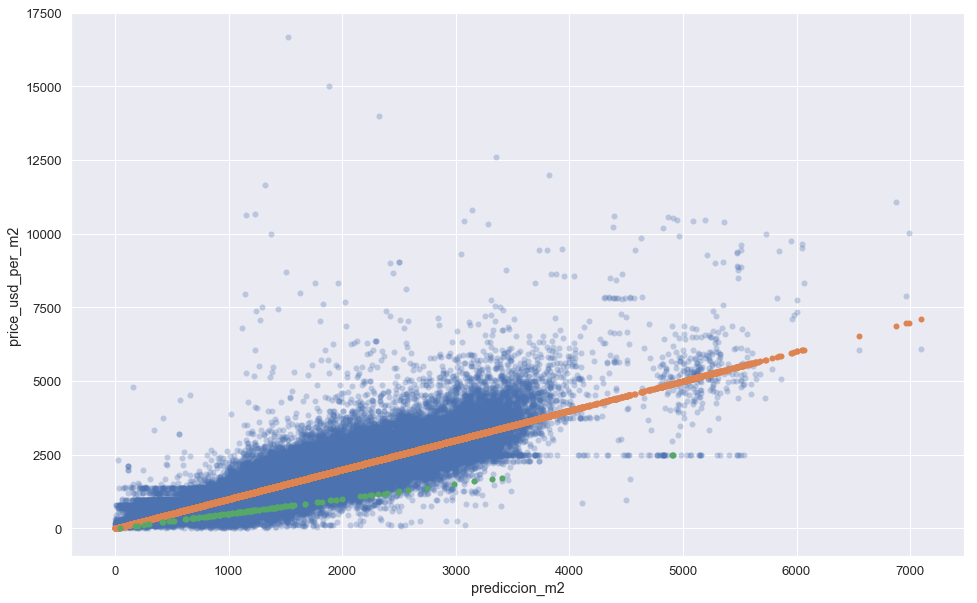

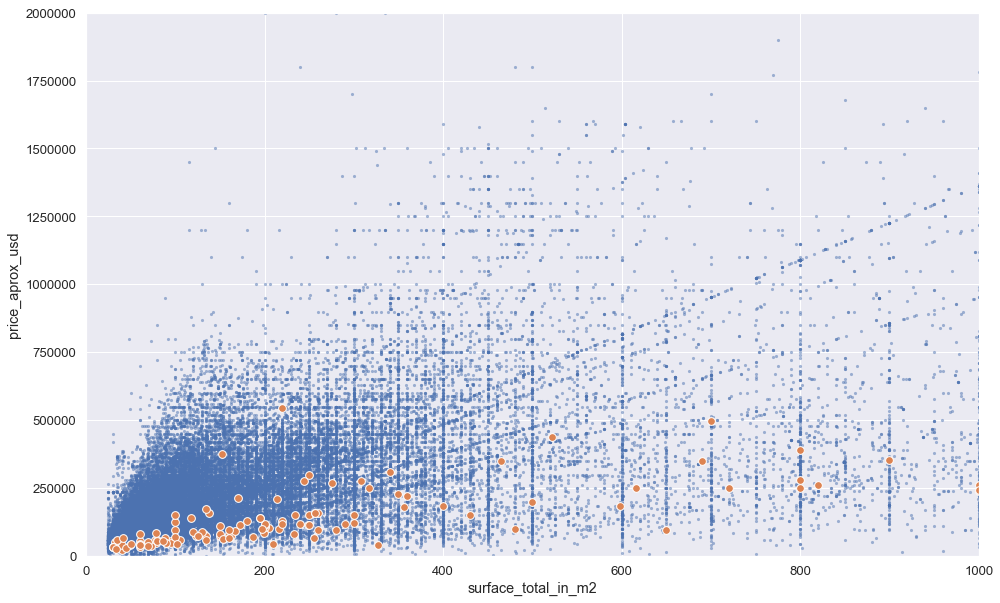

In [59]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

plt.subplots(figsize=(16,10))

sns.scatterplot(
    x="prediccion_m2", y="price_usd_per_m2", data=dfR, linewidth=0, alpha=0.3
)
sns.scatterplot(
    x="prediccion_m2", y="prediccion_m2", data=dfR, linewidth=0
)
sns.scatterplot(
    x="prediccion_m2", y="price_usd_per_m2", data=casas_compradas, linewidth=0, alpha=1
)

plt.show()

plt.subplots(figsize=(16,10))
g = sns.scatterplot(
        x="surface_total_in_m2", y="price_aprox_usd",
        data=dfR,
        s=10, linewidth=0, alpha=0.5
)
# sns.scatterplot(
#         x="surface_total_in_m2", y="prediccion_valor",
#         data=dfR,
#         s=10, linewidth=0, alpha=0.5,
# )
sns.scatterplot(
    x="surface_total_in_m2", y="price_aprox_usd", data=casas_compradas, linewidth=1, alpha=1, s=60
)

g.set(xlim=(0, 1000))
g.set(ylim=(0, 2000000))
plt.show()

In [67]:
import folium
from folium.plugins import HeatMap

In [116]:
hmap = folium.Map(location=[-35, -60], zoom_start=4.5, )

hm_wide = HeatMap(
                    list(zip(
                        casas_compradas.lat.values,
                        casas_compradas.lon.values, 
                        casas_compradas.price_aprox_usd.apply(lambda x: 1)
                    )),
                    min_opacity=0.5,
                    max_val=10,
                    radius=10, blur=10, 
                    max_zoom=1,
)

hmap.add_child(hm_wide)